In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.stats

import os, sys

project_root = '/user_data/mmhender/featsynth/'
sys.path.insert(0, os.path.join(project_root, 'code'))
from utils import stats_utils, plot_utils

import get_categ_discrim


In [4]:
# load image info
image_set_name = 'images_expt1'
image_list_filename = os.path.join(project_root, 'features','raw', '%s_list.csv'%(image_set_name))
labels = pd.read_csv(image_list_filename)

# figure out some image/category properties here
n_ims_each = np.sum(np.array(labels['basic_name'])==np.array(labels['basic_name'])[0])
basic_names = np.array(labels['basic_name'][0::n_ims_each])
super_names_long = np.array(labels['super_name'][0::n_ims_each])
basic_inds = np.array(labels['basic_index'][0::n_ims_each])
super_inds_long = np.array(labels['super_index'][0::n_ims_each])
n_basic = len(basic_names)
n_super = len(np.unique(super_names_long))
n_basic_each_super  = int(n_basic/n_super)
super_names = super_names_long[0::n_basic_each_super]
super_cbinds = np.repeat(np.array([0,1]), n_basic_each_super)
super_inds = np.arange(n_super)

# more image properties to organize images
image_type_names = ['pool1','pool2','pool3','pool4','orig']
n_image_types = len(image_type_names)
cue_level_names = ['basic','super']

In [8]:
# color
within_b1, across_b_within_s1, across_b_all1, \
            within_s1, across_s1 = \
                get_categ_discrim.compute_cosine_distances(image_set_name = 'images_expt1')

# grayscale
within_b2, across_b_within_s2, across_b_all2, \
            within_s2, across_s2 = \
                get_categ_discrim.compute_cosine_distances(image_set_name = 'images_expt2')

/user_data/mmhender/featsynth/features/simclr/images_expt1_simclr_block2_pca.npy
/user_data/mmhender/featsynth/features/simclr/images_expt1_simclr_block6_pca.npy
/user_data/mmhender/featsynth/features/simclr/images_expt1_simclr_block12_pca.npy
/user_data/mmhender/featsynth/features/simclr/images_expt1_simclr_block15_pca.npy
/user_data/mmhender/featsynth/features/simclr/images_expt2_simclr_block2_pca.npy
/user_data/mmhender/featsynth/features/simclr/images_expt2_simclr_block6_pca.npy
/user_data/mmhender/featsynth/features/simclr/images_expt2_simclr_block12_pca.npy
/user_data/mmhender/featsynth/features/simclr/images_expt2_simclr_block15_pca.npy


In [12]:
# get ratio of across to within
basic_sep1 = across_b_within_s1 / within_b1
basic_sep_all1 = across_b_all1 / within_b1

basic_sep2 = across_b_within_s2 / within_b2
basic_sep_all2 = across_b_all2 / within_b2

super_sep_each_supcat1 = across_s1 / within_s1
super_sep_each_supcat2 = across_s2 / within_s2

#### average across all the basic-level categs in each superordinate category

In [10]:
basic_sep_each_supcat1 = np.array([np.mean(basic_sep1[super_inds_long==si,:], axis=0) \
                                   for si in range(n_super)])

basic_sep_all_each_supcat1 = np.array([np.mean(basic_sep_all1[super_inds_long==si,:], axis=0) \
                                   for si in range(n_super)])

basic_sep_each_supcat2 = np.array([np.mean(basic_sep2[super_inds_long==si,:], axis=0) \
                                   for si in range(n_super)])

basic_sep_all_each_supcat2 = np.array([np.mean(basic_sep_all2[super_inds_long==si,:], axis=0) \
                                   for si in range(n_super)])

In [19]:
color_cond_colors = cm.gray(np.linspace(0,1,5))[[1,3],:]


#### plot average separability of each type

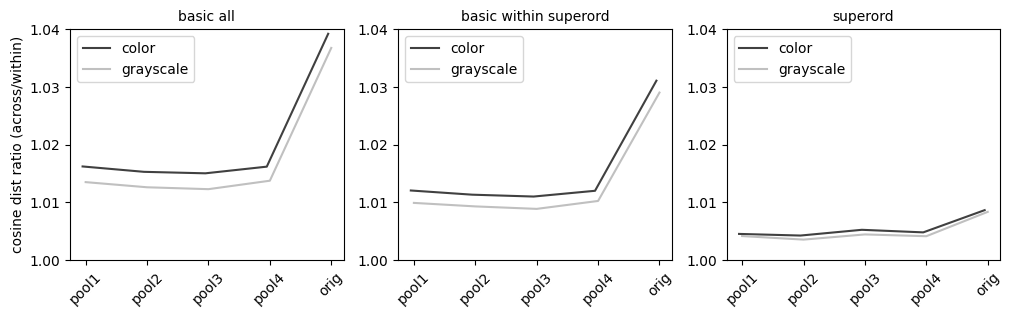

In [22]:
plot_utils.set_all_font_sizes(10)

xjitters =np.linspace(-0.05, 0.05, 3)

cue_level_colors = cm.Set1(np.linspace(0,1,9))[0:3,:]

point_types = ['o','x']
markersize = 4;

levels = ['basic all','basic within superord','superord']

plt.figure(figsize=(12,3))
pi=0;

for vals1, vals2, level in zip([basic_sep_all1, basic_sep1, super_sep_each_supcat1], \
                               [basic_sep_all2, basic_sep2, super_sep_each_supcat2], \
                               levels):
    
    
    pi+=1
    ax = plt.subplot(1,3,pi)
        # lh = []
    
    vals1 = np.mean(vals1, axis=0)
    vals2 = np.mean(vals2, axis=0)
    
    
    for cc, vals in enumerate([vals1, vals2]):
    
        h = plt.plot(np.arange(n_image_types)+xjitters[cc], vals,\
                 '-',color=color_cond_colors[cc,:])
    
        # lh.append(h[0])
    
        plt.xticks(np.arange(n_image_types), image_type_names,rotation=45)
    
    
    # plt.axhline(0, color=[0.8, 0.8, 0.8], linestyle='--')
    
    # ax.legend(lh, np.repeat(cue_level_vals,2), loc='lower right')
    ax.legend(['color','grayscale'], loc='upper left')

    if pi==1:
        plt.ylabel('cosine dist ratio (across/within)')
    
    plt.ylim([1.0, 1.04])

    plt.title(level)
    


#### separate into natural and artificial superord categories

In [9]:
is_natural = np.array([1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1]).astype(bool)
kind_names = ['Artificial','Natural']
n_kinds = len(kind_names)
nat_colors = cm.Greens(np.linspace(0,1,5))[[2,3],:]

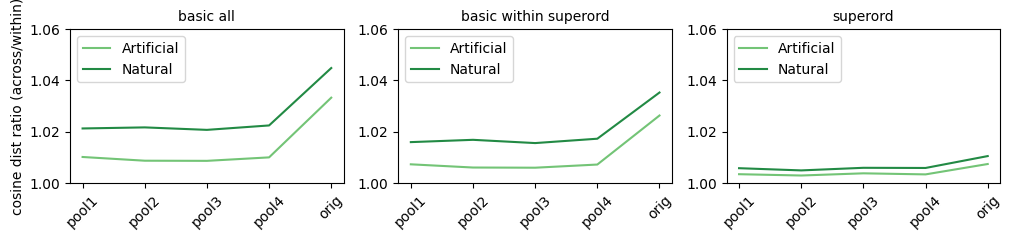

In [10]:
vals1 = np.mean(basic_sep_all, axis=0)
vals2 = np.mean(basic_sep, axis=0)
vals3 = np.mean(super_sep_each_supcat, axis=0)
levels = ['basic all','basic within superord','superord']

plt.figure(figsize=(12,2))
pi=0

for vals, level in zip([basic_sep_all_each_supcat, \
                        basic_sep_each_supcat, \
                        super_sep_each_supcat], \
                      levels):
        
    pi+=1
    ax = plt.subplot(1,3,pi)
    
    lh = []
    
    for kk in [0,1]:
    
        meanvals = np.mean(vals[is_natural==kk,:], axis=0)
    
        h = plt.plot(np.arange(n_image_types), meanvals, color=nat_colors[kk,:])
    
        lh += h
        
    ax.legend(lh, kind_names, loc='upper left');
    plt.xticks(np.arange(n_image_types), image_type_names, rotation=45);

    if pi==1:
        plt.ylabel('cosine dist ratio (across/within)')
    
    plt.ylim([1.0, 1.06])
    
    plt.title(level)

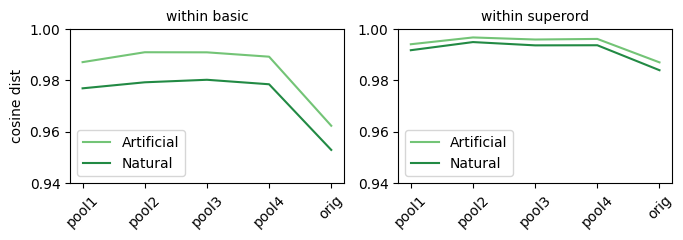

In [11]:
plt.figure(figsize=(12,2))
pi=0

levels = ['within basic','within superord']
for vals, level in zip([within_b_each_supcat, 
                        within_s], \
                      levels):
        
    pi+=1
    ax = plt.subplot(1,3,pi)
    
    lh = []
    
    for kk in [0,1]:
    
        meanvals = np.mean(vals[is_natural==kk,:], axis=0)
    
        h = plt.plot(np.arange(n_image_types), meanvals, color=nat_colors[kk,:])
    
        lh += h
        
    ax.legend(lh, kind_names, loc='lower left');
    plt.xticks(np.arange(n_image_types), image_type_names, rotation=45);

    if pi==1:
        plt.ylabel('cosine dist')

    plt.ylim([0.94, 1.0])
    # plt.ylim([1.0, 1.06])
    
    plt.title(level)

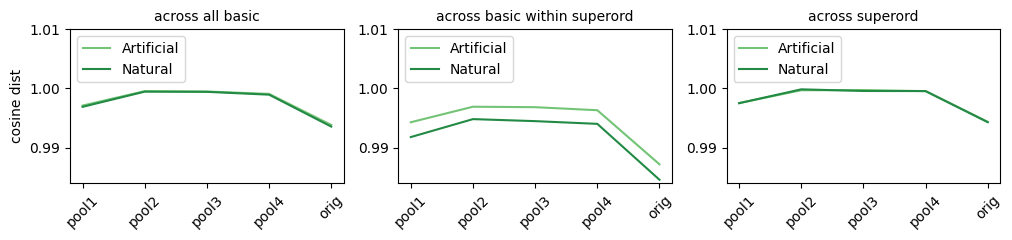

In [12]:
plt.figure(figsize=(12,2))
pi=0

levels = ['across all basic','across basic within superord', 'across superord']
for vals, level in zip([across_b_all_each_supcat,
                        across_b_within_s_each_supcat,
                        across_s], \
                      levels):
        
    pi+=1
    ax = plt.subplot(1,3,pi)
   
    lh = []
    
    for kk in [0,1]:
    
        meanvals = np.mean(vals[is_natural==kk,:], axis=0)
    
        h = plt.plot(np.arange(n_image_types), meanvals, color=nat_colors[kk,:])
    
        lh += h
        
    ax.legend(lh, kind_names, loc='upper left');
    plt.xticks(np.arange(n_image_types), image_type_names, rotation=45);

    if pi==1:
        plt.ylabel('cosine dist')

    plt.ylim([0.984, 1.01])
    # plt.ylim([1.0, 1.06])
    
    plt.title(level)

0.9943174177261523
0.0012373953440593035
0.9861091731966709
0.005121217151304303
0.9863863275734162
0.006650400856522353
0.9595059792415236
0.02927772887100776


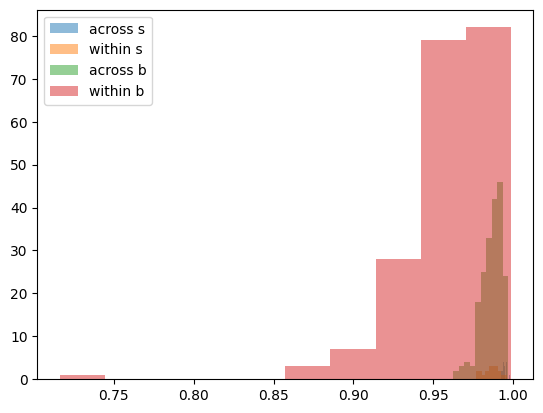

In [13]:
plt.figure()
ii = 4;
for vals in [across_s[:,ii], within_s[:,ii], across_b_within_s[:,ii], within_b[:,ii]]:

    print(np.mean(vals))
    print(np.std(vals))
    plt.hist(vals, alpha=0.5);

plt.legend(['across s','within s', 'across b', 'within b'])